EXP 7 : Time series forecasting using ARIMA

ARIMA has 4 parts, before we begin modelling 
1. Sampling
2. ADF (Augmented Dickey-Fuller)
3. Seasonal Decompose
4. ACF/PACF

--> Sampling : 
Why: Many real-world time series (like transaction data) are recorded irregularly.

What you do: Resample (e.g., daily, monthly) using .resample('D').mean() or similar.

Goal: Convert it into a proper time series with a consistent frequency.

--> ADF (Augmented Dickey-Fuller): 
Why: ARIMA assumes the time series is stationary.

What you do: Use adfuller() to check if differencing is needed (i.e., what value of d to use).

Goal: Identify how many times you need to difference (value of d in ARIMA(p,d,q)).

--> Seasonal Decompose: (optional)
Why: Helps understand if there's a trend or seasonality in the data.

What you do: Use seasonal_decompose() to visualize the trend, seasonality, and residuals.

Goal: Mainly exploratory; helpful if you're considering SARIMA later.

--> ACF/PACF plots:
Why: These help determine the values of p (autoregressive) and q (moving average).

What you do: Plot ACF for q, PACF for p.

Goal: Select reasonable values for ARIMA(p,d,q)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
)
from math import sqrt

In [16]:
df = pd.read_csv(
    "C:\\Users\\DELL\\Desktop\\College\\Practicals-Apr-2025\\ADS_codes\\ADS Datasets\\supermarket_sales - Sheet1.csv"
)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [17]:
df['Date'] = pd.to_datetime(df['Date'])

data = df[df['City'] == 'Yangon']

data = data[["Date","Total"]]
data = data.sort_values("Date")
data = data.dropna()

In [18]:
# A. Resampling
data.set_index("Date", inplace=True)
data = data["Total"].resample("D").mean()
# Set date as index and resample daily

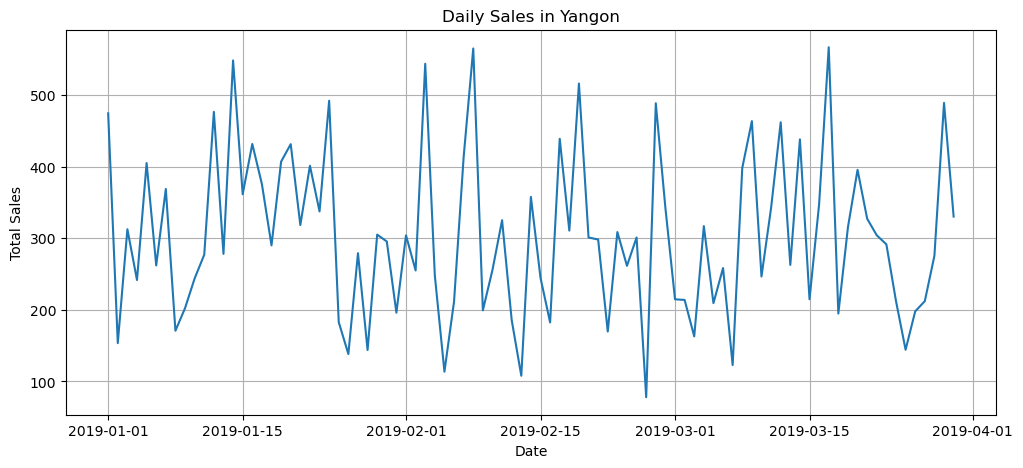

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(data)
plt.title("Daily Sales in Yangon")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

In [20]:
# B. ADF (Augmented Dickey-Fuller)
result = adfuller(data)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -9.377777525220415
p-value: 7.090576285033997e-16


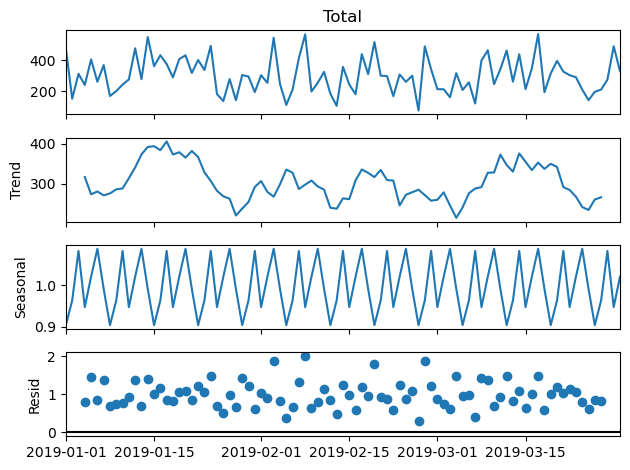

In [21]:
# 3. Seasonal Decompose (Optional) -- used for SARIMA if needed

decomp = seasonal_decompose(data, model="multiplicative")
decomp.plot()
plt.show()

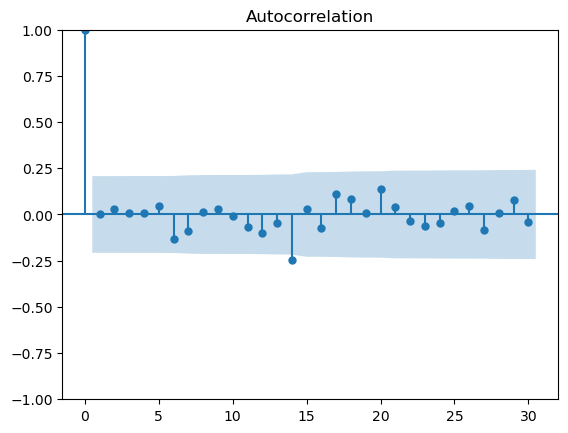

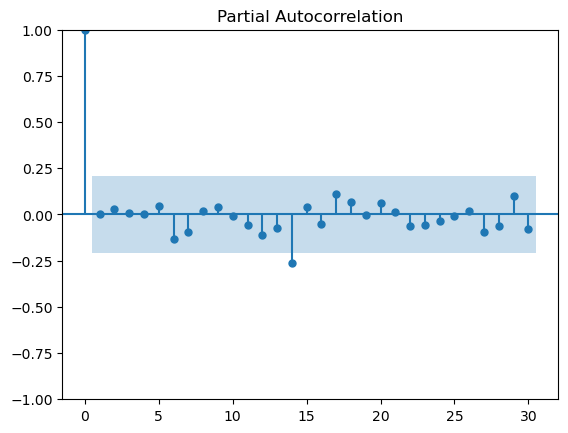

In [22]:
# 4. ACF/PACF -- to determine p and q values of the ((p,d,q)) of ARIMA
plot_acf(data, lags=30)
plt.show()

plot_pacf(data, lags=30)
plt.show()

In [23]:
# Time-based train-test split (last 30 days as test)
train = data[:-30]
test = data[-30:]


model = ARIMA(train, order=(1,1,1))

model_fit = model.fit()


# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)
forecast.index = test.index  # Align index for plotting

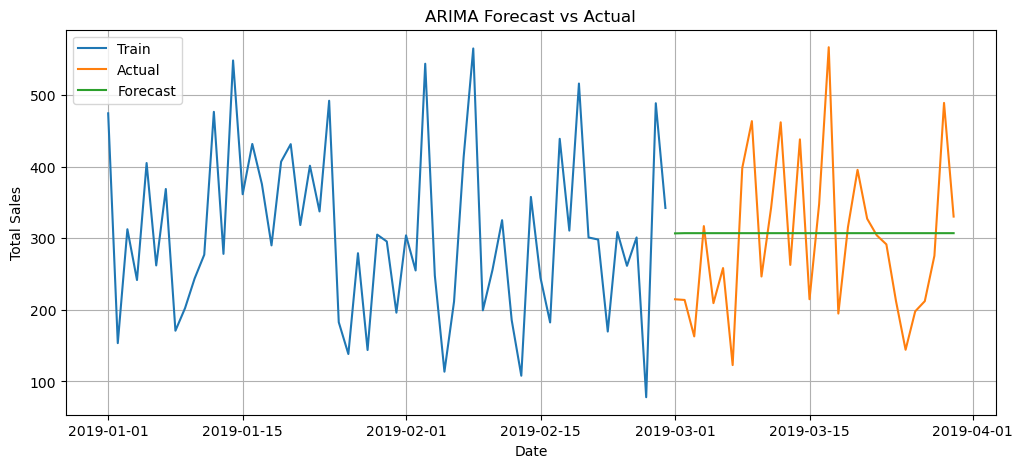

In [24]:
# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual")
plt.plot(forecast.index, forecast, label="Forecast")
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

In [25]:
# Error metrics
print("MAE:", mean_absolute_error(test, forecast))
print("MAPE:", mean_absolute_percentage_error(test, forecast))
print("RMSE:", sqrt(mean_squared_error(test, forecast)))

MAE: 89.35061849301093
MAPE: 0.35780895366461346
RMSE: 108.63484597594682
